In [276]:
from pymatgen.ext.matproj import MPRester 
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


with MPRester("N7ufawmcbIbaWNUI5qt") as m:
     
     # Obtenir la structure de bande à partir du Materials Project Id
     bandstructure = m.get_bandstructure_by_material_id("mp-8880")

Caratéristiques de la bande interdite : 
---------------------------------------
Bande interdite directe ? :  False

Energie de la bande interdite :  1.9532999999999996 eV

Il s'agit donc d'une bande interdite indirecte avec Eg = 1,95 eV. En effet, le minimum d'énergie de la première bande de conduction et le maximum d'énergie de la dernière bande de valence ne sont pas associées au même vecteur d'onde. Ceci peut se vérifier sur le graphe ci-dessous. Puisque la bande interdite a une energie inférieure à 2 eV, il s'agit d'un semi-conducteur. 


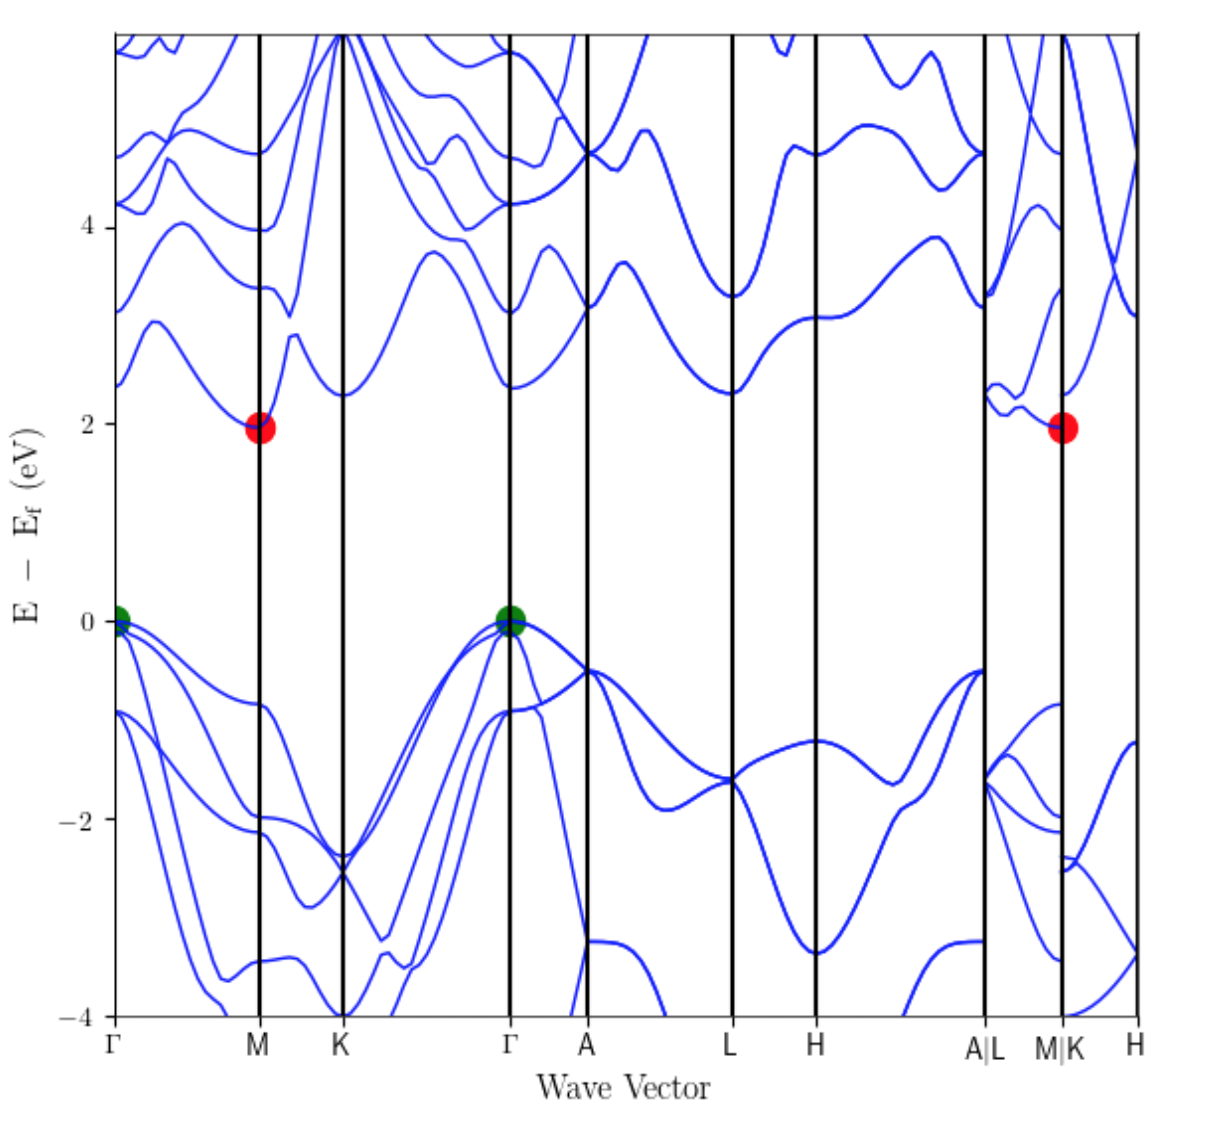

In [277]:
# Obtenir la bande interdite
bandgap = bandstructure.get_band_gap() 

print("Caratéristiques de la bande interdite : ")
print("---------------------------------------")
print("Bande interdite directe ? : ", bandgap.get('direct'))
print("")
print("Energie de la bande interdite : ", bandgap.get('energy'),"eV")
print("")
print("Il s'agit donc d'une bande interdite indirecte avec Eg = 1,95 eV. En effet, le minimum d'énergie de la première bande de conduction et le maximum d'énergie de la dernière bande de valence ne sont pas associées au même vecteur d'onde. Ceci peut se vérifier sur le graphe ci-dessous. Puisque la bande interdite a une energie inférieure à 2 eV, il s'agit d'un semi-conducteur. ")

Image(filename = 'BandStructure.png')

In [278]:
print("Direction présentant le moins et le plus de dispersion :")
print("--------------------------------------------------------")
print("Nous allons maintenant déterminer la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.")

Direction présentant le moins et le plus de dispersion :
--------------------------------------------------------
Nous allons maintenant déterminer la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.


In [279]:
# Créer un objet BSPlotter
bsplotter = BSPlotter(bandstructure)

# Obtenir les données du plot
data = bsplotter.bs_plot_data()

ticks = data.get('ticks')

# Distance de chaque branche par rapport à Γ
distance = ticks.get('distance')

# Distance entre chaque branche différente en retirant les redondances 

dist1 = distance[1]-distance[0]
dist2 = distance[3]-distance[1]
dist3 = distance[5]-distance[3]
dist4 = distance[7]-distance[5]
dist5 = distance[9]-distance[7]
dist6 = distance[11]-distance[9]
dist7 = distance[13]-distance[11]
dist8 = distance[14]-distance[13]
dist9 = distance[15]-distance[14]

In [280]:
# Dernière bande de valence

# Obtenir l'énergie des bandes
Energie = data.get('energy')

# Différence d'énergie entre chaque branche pour la dernière bande de valence

DeltaValE1 = (Energie[0].get('1')[7])[len(Energie[0].get('1')[7])-1] - (Energie[0].get('1')[7])[0]
DeltaValE2 = (Energie[1].get('1')[7])[len(Energie[1].get('1')[7])-1] - (Energie[1].get('1')[7])[0]
DeltaValE3 = (Energie[2].get('1')[7])[len(Energie[2].get('1')[7])-1] - (Energie[2].get('1')[7])[0]
DeltaValE4 = (Energie[3].get('1')[7])[len(Energie[3].get('1')[7])-1] - (Energie[3].get('1')[7])[0]
DeltaValE5 = (Energie[4].get('1')[7])[len(Energie[4].get('1')[7])-1] - (Energie[4].get('1')[7])[0]
DeltaValE6 = (Energie[5].get('1')[7])[len(Energie[5].get('1')[7])-1] - (Energie[5].get('1')[7])[0]
DeltaValE7 = (Energie[6].get('1')[7])[len(Energie[6].get('1')[7])-1] - (Energie[6].get('1')[7])[0]
DeltaValE8 = (Energie[7].get('1')[7])[len(Energie[7].get('1')[7])-1] - (Energie[7].get('1')[7])[0]
DeltaValE9 = (Energie[8].get('1')[7])[len(Energie[8].get('1')[7])-1] - (Energie[8].get('1')[7])[0]

# Pente entre chaque branche pour la dernière bande de valence

PenteVal1 = DeltaValE1/dist1
PenteVal2 = DeltaValE2/dist2
PenteVal3 = DeltaValE3/dist3
PenteVal4 = DeltaValE4/dist4
PenteVal5 = DeltaValE5/dist5
PenteVal6 = DeltaValE6/dist6
PenteVal7 = DeltaValE7/dist7
PenteVal8 = DeltaValE8/dist8
PenteVal9 = DeltaValE9/dist9

# Vecteur avec toutes les pentes de la dernière bande de valence
PentesVal = np.array([PenteVal1, PenteVal2, PenteVal3, PenteVal4, PenteVal5, PenteVal6, PenteVal7, PenteVal8, PenteVal9])

# Pente de la dernière bande de valence présentant le plus de dispersion 

PlusDispVal = max(abs(PentesVal))

# Pente de la dernière bande de valence présentant le moins de dispersion 

MoinsDispVal = min(abs(PentesVal))

print("Dernière bande de valence : ")
print("---------------------------")

print("")
print("PenteVal1 = ", PenteVal1)
print("PenteVal2 = ", PenteVal2)
print("PenteVal3 = ", PenteVal3)
print("PenteVal4 = ", PenteVal4)
print("PenteVal5 = ", PenteVal5)
print("PenteVal6 = ", PenteVal6)
print("PenteVal7 = ", PenteVal7)
print("PenteVal8 = ", PenteVal8)
print("PenteVal9 = ", PenteVal9)

print("")
print("La pente de la dernière bande de valence où il y a le plus de dispersion vaut", PlusDispVal,". Ceci correspond à la variable PenteVal2 et donc à la direction M/K. Ceci peut être vérifié sur le graphe ci-dessous (flèche rouge).")
print("")
print("La pente de la dernière bande de valence où il y a le moins de dispersion vaut", MoinsDispVal,". Ceci correspond à la variable PenteVal7 et donc à la direction H/A|L. Ceci peut être vérifié sur le graphe ci-dessous (flèche verte).")

Dernière bande de valence : 
---------------------------

PenteVal1 =  -0.8948695397250739
PenteVal2 =  -2.851024737410216
PenteVal3 =  2.2005531658863826
PenteVal4 =  -1.0245582257846333
PenteVal5 =  -1.172217988181859
PenteVal6 =  0.7653982003129399
PenteVal7 =  0.6324698605973605
PenteVal8 =  1.548689554656463
PenteVal9 =  2.3971866576001144

La pente de la dernière bande de valence où il y a le plus de dispersion vaut 2.851024737410216 . Ceci correspond à la variable PenteVal2 et donc à la direction M/K. Ceci peut être vérifié sur le graphe ci-dessous (flèche rouge).

La pente de la dernière bande de valence où il y a le moins de dispersion vaut 0.6324698605973605 . Ceci correspond à la variable PenteVal7 et donc à la direction H/A|L. Ceci peut être vérifié sur le graphe ci-dessous (flèche verte).


In [290]:
# Première bande de conduction

# Obtenir l'énergie des bandes
Energie = data.get('energy')

# Différence d'énergie entre chaque branche pour la première bande de conduction

DeltaCondE1  = (Energie[0].get('1')[8])[len(Energie[0].get('1')[8])-1] - (Energie[0].get('1')[8])[0]
DeltaCondE2  = (Energie[1].get('1')[8])[len(Energie[1].get('1')[8])-1] - (Energie[1].get('1')[8])[0]
DeltaCondE3  = (Energie[2].get('1')[8])[len(Energie[2].get('1')[8])-1] - (Energie[2].get('1')[8])[0]
DeltaCondE4  = (Energie[3].get('1')[8])[len(Energie[3].get('1')[8])-1] - (Energie[3].get('1')[8])[0]
DeltaCondE5  = (Energie[4].get('1')[8])[len(Energie[4].get('1')[8])-1] - (Energie[4].get('1')[8])[0]
DeltaCondE6  = (Energie[5].get('1')[8])[len(Energie[5].get('1')[8])-1] - (Energie[5].get('1')[8])[0]
DeltaCondE7  = (Energie[6].get('1')[8])[len(Energie[6].get('1')[8])-1] - (Energie[6].get('1')[8])[0]
DeltaCondE8  = (Energie[7].get('1')[8])[len(Energie[7].get('1')[8])-1] - (Energie[7].get('1')[8])[0]
DeltaCondE9  = (Energie[8].get('1')[8])[len(Energie[8].get('1')[8])-1] - (Energie[8].get('1')[8])[0]

# Pente entre chaque branche pour la première bande de conduction

PenteCond1 = DeltaCondE1/dist1
PenteCond2 = DeltaCondE2/dist2
PenteCond3 = DeltaCondE3/dist3
PenteCond4 = DeltaCondE4/dist4
PenteCond5 = DeltaCondE5/dist5
PenteCond6 = DeltaCondE6/dist6
PenteCond7 = DeltaCondE7/dist7
PenteCond8 = DeltaCondE8/dist8
PenteCond9 = DeltaCondE9/dist9

# Vecteur avec toutes les pentes de la première bande de conduction
PentesCond = np.array([PenteCond1, PenteCond2, PenteCond3, PenteCond4, PenteCond5, PenteCond6, PenteCond7, PenteCond8, PenteCond9])

# Pente de la première bande de conduction présentant le plus de dispersion 

PlusDispCond = max(abs(PentesCond))

# Pente de la première bande de conduction présentant le moins de dispersion 

MoinsDispCond = min(abs(PentesCond))

print("Première bande de conduction : ")
print("------------------------------")

print("")
print("PenteCond1 =", PenteCond1)
print("PenteCond2 =", PenteCond2)
print("PenteCond3 =", PenteCond3)
print("PenteCond4 =", PenteCond4)
print("PenteCond5 =", PenteCond5)
print("PenteCond6 =", PenteCond6)
print("PenteCond7 =", PenteCond7)
print("PenteCond8 =", PenteCond8)
print("PenteCond9 =", PenteCond9)

print("")
print("La pente de la première bande de conduction où il y a le plus de dispersion vaut", PlusDispCond,". Ceci correspond à la variable PenteCond4 et donc à la direction Γ/A. Ceci peut être vérifié sur le graphe ci-dessous (flèche noire).")
print("")
print("La pente de la première bande de conduction où il y a le moins de dispersion vaut", MoinsDispCond,". Ceci correspond à la variable PenteCond3 et donc à la direction K/Γ. Ceci peut être vérifié sur le graphe ci-dessous (flèche bleue).")

Première bande de conduction : 
------------------------------

PenteCond1 = -0.4076068036461882
PenteCond2 = 0.6601141683921664
PenteCond3 = 0.022933067464408263
PenteCond4 = 1.6605258490272605
PenteCond5 = -0.8874721516525909
PenteCond6 = 1.4496515647363222
PenteCond7 = 0.04373066710824414
PenteCond8 = -0.7536793751075427
PenteCond9 = 1.615143004934763

La pente de la première bande de conduction où il y a le plus de dispersion vaut 1.6605258490272605 . Ceci correspond à la variable PenteCond4 et donc à la direction Γ/A. Ceci peut être vérifié sur le graphe ci-dessous (flèche noire).

La pente de la première bande de conduction où il y a le moins de dispersion vaut 0.022933067464408263 . Ceci correspond à la variable PenteCond3 et donc à la direction K/Γ. Ceci peut être vérifié sur le graphe ci-dessous (flèche bleue).


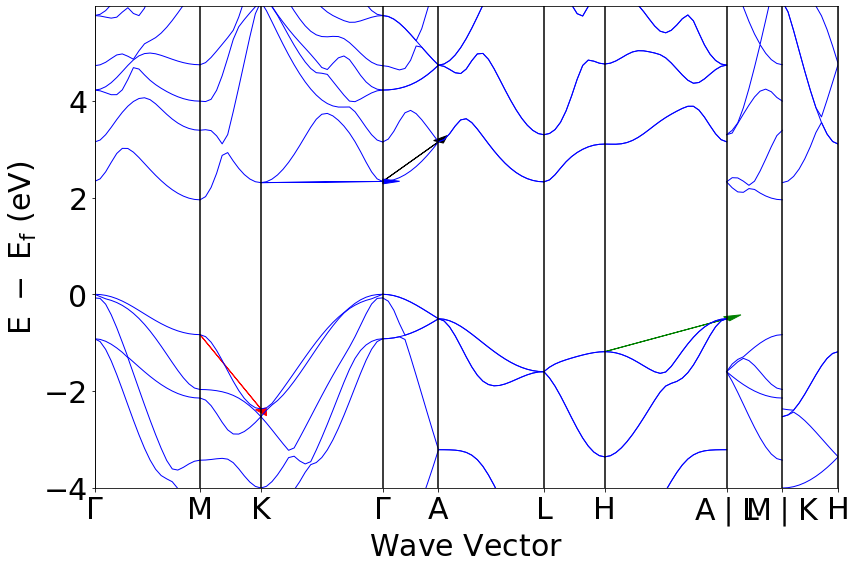

In [291]:
bsplotter.get_plot()

# Flèche représentant la direction pour laquelle la bande de valence présente le plus de dispersion 
FlechePlusDispVal = plt.arrow(distance[1], (Energie[1].get('1')[7])[0], dist2, (Energie[1].get('1')[7])[len(Energie[1].get('1')[7])-1] - (Energie[1].get('1')[7])[0], color = 'r', head_width = 0.1)

# Flèche représentant la direction pour laquelle la bande de valence présente le moins de dispersion 
FlecheMoinsDispVal = plt.arrow(distance[11], (Energie[6].get('1')[7])[0], dist7, (Energie[6].get('1')[7])[len(Energie[6].get('1')[7])-1] - (Energie[6].get('1')[7])[0], color = 'g', head_width = 0.1)

# Flèche représentant la direction pour laquelle la bande de conduction présente le plus de dispersion 
FlechePlusDispCond = plt.arrow(distance[5], (Energie[3].get('1')[8])[0], dist4, (Energie[3].get('1')[8])[len(Energie[3].get('1')[8])-1] - (Energie[3].get('1')[8])[0], color = 'k', head_width = 0.1)

# Flèche représentant la direction pour laquelle la bande de conduction présente le moins de dispersion 
FlecheMoinsDispCond = plt.arrow(distance[3], (Energie[2].get('1')[8])[0], dist3, (Energie[2].get('1')[8])[len(Energie[2].get('1')[8])-1] - (Energie[2].get('1')[8])[0], color = 'b', head_width = 0.1)

In [292]:
print("Calcul de la masse effective :")
print("------------------------------")
print("")

print("Pour calculer la masse effective, nous allons utiliser la formule suivante (ℏ est la constante de Planck, ε l'énergie et k le vecteur d'onde) : ")

Calcul de la masse effective :
------------------------------

Pour calculer la masse effective, nous allons utiliser la formule suivante (ℏ est la constante de Planck, ε l'énergie et k le vecteur d'onde) : 


\begin{equation*}
m^* = \frac{ℏ^2}{\frac{\delta^2 \epsilon}{\delta k^2}}
\end{equation*}

In [284]:
print("Nous allons alors supposer une dispersion parabolique et calculer l'équation de cette parabole :")
print("L'équation de la parabole est donnée par :")

Nous allons alors supposer une dispersion parabolique et calculer l'équation de cette parabole :
L'équation de la parabole est donnée par :


\begin{equation*}
y = a k^2 + b k + c
\end{equation*}

In [285]:
print("Nous pouvons alors calculer les paramètres a,b,c de l'équation de la parabole dans le cas de la dernière bande de valence et de la première bande de conduction.")
print("Soit une parabole passant par le sommet (A,B) et par un autre point (C,D).")
print("Les paramètres a,b,c sont donnés par :")

Nous pouvons alors calculer les paramètres a,b,c de l'équation de la parabole dans le cas de la dernière bande de valence et de la première bande de conduction.
Soit une parabole passant par le sommet (A,B) et par un autre point (C,D).
Les paramètres a,b,c sont donnés par :


\begin{equation*}
  a = \frac{D-B}{(A-C)^2}
\end{equation*}
\begin{equation*}
  b = -2Aa
\end{equation*}
\begin{equation*}
  c = D - \frac{D-B}{(A-C)^2} C^2 + 2  \frac{D-B}{(A-C)^2} AC
\end{equation*}

In [286]:
# Calcul équation de la parabole pour la dernière bande de valence

# Coordonnées du sommet de la parabole
PointXMaxVal = distance[5]
PointYMaxVal = (Energie[3].get('1')[7])[0]

# Coordonnées d'un autre point passant par cette parabole
AutrePointXVal = distance[5] + (7/(len(Energie[3].get('1')[7])-1))*dist4
AutrePointYVal = (Energie[3].get('1')[7])[7]


# Calcul paramètres a,b,c
AVal = PointXMaxVal
BVal = PointYMaxVal
CVal = AutrePointXVal
DVal = AutrePointYVal

aVal = (DVal-BVal)/((AVal-CVal)*(AVal-CVal))
bVal = -2*AVal*aVal
cVal = DVal - (((DVal-BVal)/((AVal-CVal)*(AVal-CVal)))*CVal*CVal) + 2*((DVal-BVal)/((AVal-CVal)*(AVal-CVal)))*AVal*CVal

# Calcul dérivée seconde
DerSecVal1 = 2*aVal

# Changements d'unités (eV*Å^2 ----> J*m^2)
eV = 1.60218E-19
m = 1.0E-20  
DerSecVal2 = DerSecVal1*eV*m

# Calcul masse effective
hbarre = 1.054571818E-34

MasseEffVal = (hbarre*hbarre)/DerSecVal2



print("Dernière bande de valence :")
print("---------------------------") 
print("Nous savons que la parabole passe par le sommet (", PointXMaxVal ,",", PointYMaxVal,") et aussi par le point (", AutrePointXVal ,",", AutrePointYVal,")") 
print("")
print("Nous obtenons alors les paramètres suivants : ")
print("a =", aVal)
print("b =", bVal)
print("c =", cVal)

print("")
print("L'équation de la parabole est alors : y =", aVal,"k^2 +", bVal,"k+",cVal)
print("")
print("La derivée seconde est égale à y'' =", DerSecVal1, "eV*Å^2 et donc y'' =", DerSecVal2, "J*m^2")
print("")
print("La masse effective au sommet de la dernière bande de valence vaut donc m* = ",MasseEffVal,"kg")

Dernière bande de valence :
---------------------------
Nous savons que la parabole passe par le sommet ( 2.548352238148844 , 0.0 ) et aussi par le point ( 2.893857248104628 , -0.2900999999999998 )

Nous obtenons alors les paramètres suivants : 
a = -2.430183290538621
b = 12.385926055112035
c = -15.78185119204542

L'équation de la parabole est alors : y = -2.430183290538621 k^2 + 12.385926055112035 k+ -15.78185119204542

La derivée seconde est égale à y'' = -4.860366581077242 eV*Å^2 et donc y'' = -7.787182128870335e-39 J*m^2

La masse effective au sommet de la dernière bande de valence vaut donc m* =  -1.4281439690446246e-30 kg


Nous voyons que la parabole (courbe verte) d'équation y = -2.430183290538621 k^2 + 12.385926055112035 k+ -15.78185119204542 est une bonne approximation au sommet de la dernière bande de valence.


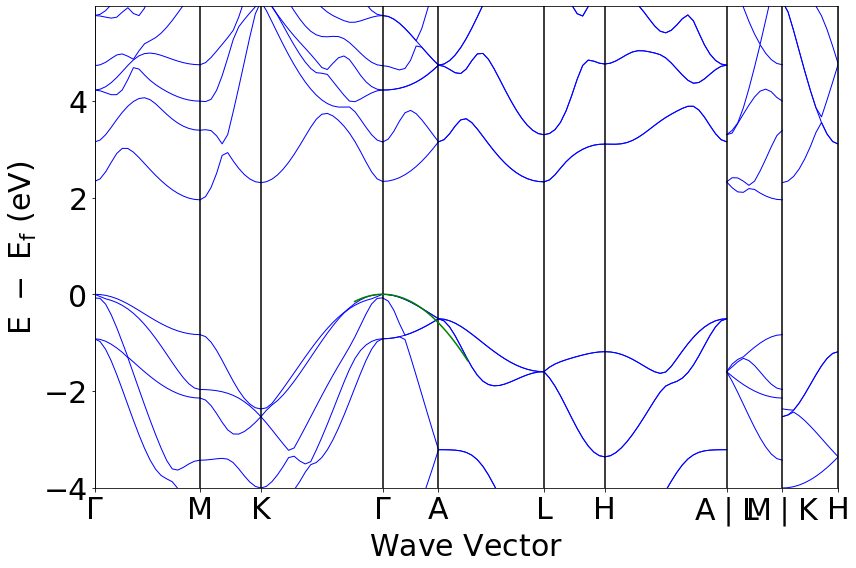

In [287]:
# Plot de la parabole approximant la dernière bande de valence
bsplotter.get_plot()

kVal = np.linspace(2.3,3.3,1000)
yVal = aVal*kVal*kVal+bVal*kVal+cVal 
plt.plot(kVal,yVal,color ='g') 
print("Nous voyons que la parabole (courbe verte) d'équation y =", aVal,"k^2 +", bVal,"k+",cVal, "est une bonne approximation au sommet de la dernière bande de valence.")

In [293]:
# Calcul équation de la parabole pour la première bande de conduction

# Coordonnées du sommet de la parabole
PointXMinCond = distance[1]
PointYMinCond = (Energie[1].get('1')[8])[0]

# Coordonnées d'un autre point passant par cette parabole
AutrePointXCond = distance[1] + (3/(len(Energie[1].get('1')[8])-1))*dist2
AutrePointYCond = (Energie[1].get('1')[8])[3]

# Calcul paramètres a,b,c
ACond = PointXMinCond
BCond = PointYMinCond
CCond = AutrePointXCond
DCond = AutrePointYCond

aCond = (DCond-BCond)/((ACond-CCond)*(ACond-CCond))
bCond = -2*ACond*aCond
cCond = DCond - (((DCond-BCond)/((ACond-CCond)*(ACond-CCond)))*CCond*CCond) + 2*((DCond-BCond)/((ACond-CCond)*(ACond-CCond)))*ACond*CCond

# Calcul dérivée seconde
DerSecCond1 = 2*a

# Changements d'unités (eV*Å^2 ----> J*m^2)
eV = 1.60218E-19
m = 1.0E-20  
DerSecCond2 = DerSecCond1*eV*m

# Calcul masse effective
hbarre = 1.054571818E-34

MasseEffCond = (hbarre*hbarre)/DerSecCond2



print("Première bande de conduction :")
print("---------------------------") 
print("Nous savons que la parabole passe par le sommet (", PointXMinCond ,",", PointYMinCond,") et aussi par le point (", AutrePointXCond ,",", AutrePointYCond,")") 
print("")
print("Nous obtenons alors les paramètres suivants : ")
print("a =", aCond)
print("b =", bCond)
print("c =", cCond)

print("")
print("L'équation de la parabole est alors : y =", aCond,"k^2 +", bCond,"k+",cCond)
print("")
print("La derivée seconde est égale à y'' =", DerSecCond1, "eV*Å^2 et donc y'' =", DerSecCond2, "J*m^2")
print("")
print("La masse effective au sommet de la dernière bande de valence vaut donc m* =", MasseEffCond,"kg")

Première bande de conduction :
---------------------------
Nous savons que la parabole passe par le sommet ( 0.9327616629530611 , 1.9532999999999996 ) et aussi par le point ( 1.0796370825349444 , 2.5008 )

Nous obtenons alors les paramètres suivants : 
a = 25.379664862927683
b = -47.34635680547159
c = 24.034733254320336

L'équation de la parabole est alors : y = 25.379664862927683 k^2 + -47.34635680547159 k+ 24.034733254320336

La derivée seconde est égale à y'' = 50.759329725855366 eV*Å^2 et donc y'' = 8.132558290017093e-38 J*m^2

La masse effective au sommet de la dernière bande de valence vaut donc m* = 1.3674930810947653e-31 kg


Nous voyons que la parabole (courbe verte) d'équation y = 25.379664862927683 k^2 + -47.34635680547159 k+ 24.034733254320336 est une bonne approximation à la base de la première bande de conduction.


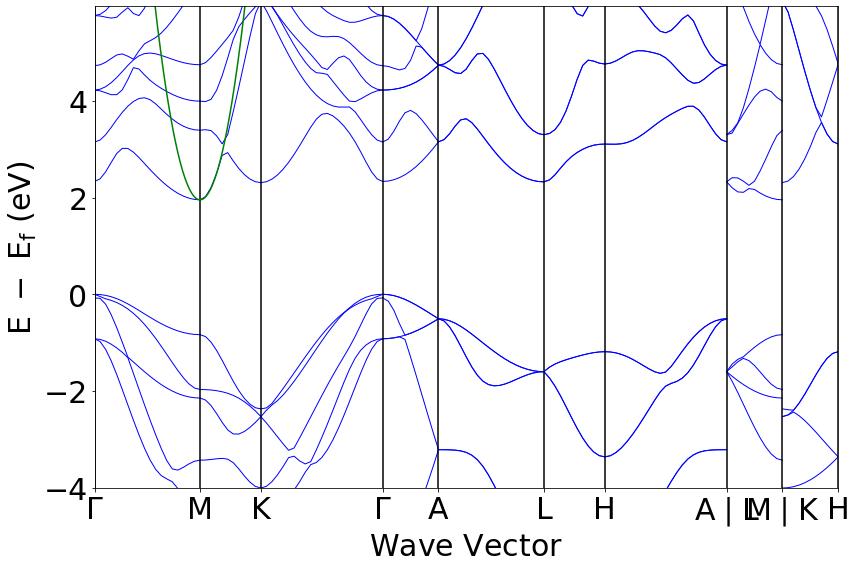

In [294]:
# Plot de la parabole approximant la première bande de conduction
bsplotter.get_plot()

kCond = np.linspace(0.5,1.5,1000)
yCond = aCond*kCond*kCond+bCond*kCond+cCond 
plt.plot(kCond,yCond,color ='g') 
print("Nous voyons que la parabole (courbe verte) d'équation y =", aCond,"k^2 +", bCond,"k+",cCond, "est une bonne approximation à la base de la première bande de conduction.")

In [275]:
print("Références :")
print("------------")

print("* LMAPR1492 : Physique des matériaux - https://moodleucl.uclouvain.be/course/view.php?id=7353")
print("* Pymatgen : https://pymatgen.org/usage.html?fbclid=IwAR2AnLq_gW-VnqEG7-i42wszUE8sytOJDK790cZQnyq8xfKaoVxDYFml04o#pymatgen-matproj-rest-integration-with-the-materials-project-rest-api")
print("")
print("* Materials Project - https://materialsproject.org/materials/mp-8880/")

Références :
------------
* LMAPR1492 : Physique des matériaux - https://moodleucl.uclouvain.be/course/view.php?id=7353
* Pymatgen : https://pymatgen.org/usage.html?fbclid=IwAR2AnLq_gW-VnqEG7-i42wszUE8sytOJDK790cZQnyq8xfKaoVxDYFml04o#pymatgen-matproj-rest-integration-with-the-materials-project-rest-api

* Materials Project - https://materialsproject.org/materials/mp-8880/
